In [1]:
from pulp import *

problem = pulp.LpProblem(pulp.LpMaximize)

x = pulp.LpVariable("t30", lowBound = 0)
y = pulp.LpVariable("t20", lowBound = 0)
z = pulp.LpVariable("t10", lowBound = 0)


problem += x + y + z, "The objective function"
problem += -3*x + -2*y + -1*z <= -540, "1st constraint (cover 90 miles)"
problem += 17*x + 10*y + 3*z  <= 2000, "2nd constraint (calories)"
# problem.writeLP("bike.lp")
problem.solve()

for var in problem.variables():
    print(var.name, ' = ', var.varValue)
    



t10  =  397.5
t20  =  0.0
t30  =  47.5


In [2]:
total_distance = pulp.value(problem.objective)
print("Total distance: ", total_distance, " and minutes: ", round(total_distance/60,2))
print("Status:", LpStatus[problem.status])

Total distance:  445.0  and minutes:  7.42
Status: Optimal


In [3]:
prob1 = pulp.LpProblem(pulp.LpMaximize)

s = pulp.LpVariable('ds',0)
a = pulp.LpVariable('da',lowBound = 0)
b = pulp.LpVariable('db',lowBound = 0)
t = pulp.LpVariable('dt',lowBound = 0)

"dt is what we are maximizing d[u] to d[v]"
"d[v]<= d[u] + w(u,v) --> d[v] - d[u] <= w(u,v)"
prob1 += s-t, "The objective function: maximizing a s-t distance a negative number (shortest)"
prob1 += a - s <= 1, "edge as"
prob1 += b - a <= 2, "edge ba"
prob1 += t - b <= 1, "edge tb"
prob1 += t - a <= 4, "edge ta"
prob1 += t - s <= 10, "edge ts"

prob1.solve()

for var in prob1.variables():
    print(var.name, ' = ', var.varValue)

da  =  1.0
db  =  3.0
ds  =  0.0
dt  =  4.0


In [21]:
import pulp

prob3 = pulp.LpProblem(pulp.LpMaximize)
#(var name, lowbound, upper bound, type of data discrete/continuous)
x = pulp.LpVariable('x', lowBound = 0 )
y = pulp.LpVariable('y', lowBound = 0)

prob3 += x + 5*y, "The objective function: maximizing)"
prob3 += x + 2*y <= 10, "1 cont"
prob3 += 4*x + y <= 12, "2nd cont"
prob3.solve()

for var in prob3.variables():
    print(var.name, ' = ', var.varValue)
    

x  =  0.0
y  =  0.0


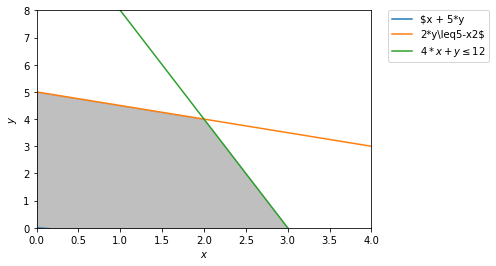

In [5]:

    
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)
# y >= 2
y1 = -x/5
# 2y <= 25 - x
y2 = (10 - x)/2
# 4y >= 2x - 8 
y3 = (12 - 4*x)



        
plt.plot(x, y1, label=r'$x + 5*y')
plt.plot(x, y2, label=r'2*y\leq5-x2$')
plt.plot(x, y3, label=r'$4*x + y\leq12$')

plt.xlim((0, 4))
plt.ylim((0, 8))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
y5 = np.minimum(y2, y3)
y6 = np.minimum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

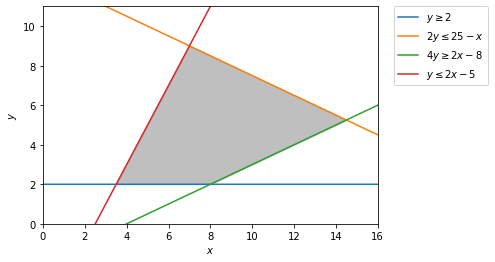

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x -5

# Make plot
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [7]:
    """ 
    A simple linear optimization problem with 2 variables 
    """
    import pulp

    x = pulp.LpVariable('xa', lowBound=0)
    y = pulp.LpVariable('y', lowBound=0)
    
    problem = pulp.LpProblem(
        'A simple maximization objective', 
        pulp.LpMaximize)
    problem += 3*x + 2*y, 'The objective function'
    problem += 2*x + y <= 100, '1st constraint'
    problem += x + y <= 80, '2nd constraint'
    problem += x <= 40, '3rd constraint'
    problem.solve()
    
    print("Maximization Results:")
    for variable in problem.variables():
        print(variable.name, '=', variable.varValue)

Maximization Results:
xa = 20.0
y = 60.0


In [8]:
# import PuLP
from pulp import *

# Create the 'prob' variable to contain the problem data
prob = LpProblem("The Miracle Worker", LpMaximize)

# Create problem variables
x=LpVariable("Medicine_1_units",0,None,LpInteger)
y=LpVariable("Medicine_2_units",0, None, LpInteger)

# The objective function is added to 'prob' first
prob += 25*x + 20*y, "Health restored; to be maximized"
# The two constraints are entered
prob += 3*x + 4*y <= 25, "Herb A constraint"
prob += 2*x + y <= 10, "Herb B constraint"

# The problem data is written to an .lp file
prob.writeLP("MiracleWorker.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

1

In [9]:
prob1 = pulp.LpProblem(pulp.LpMaximize)

s = pulp.LpVariable('ds',0)
a = pulp.LpVariable('da',lowBound = 0)
b = pulp.LpVariable('db',lowBound = 0)
t = pulp.LpVariable('dt',lowBound = 0)
c = pulp.LpVariable('dc',lowBound = 0)

prob1 += s - t, "The objective function: maximizing a s-t distance a negative number (shortest)"
prob1 += a - s <= 1, "edge as"
prob1 += b - a <= 2, "edge ba"
prob1 += t - b <= 1, "edge tb"
prob1 += t - a <= 4, "edge ta"
prob1 += t - s <= 10, "edge ts"
prob1 += t - c <= 1, "edge tc"
prob1 += c - s <= 1, "edge cs"

prob1.solve()

for var in prob1.variables():
    print(var.name, ' = ', var.varValue)
    



da  =  1.0
db  =  3.0
dc  =  1.0
ds  =  0.0
dt  =  2.0


In [ ]:

from collections import defaultdict 
import queue
import sys


class Vertex:
    def __init__(self, n):
        self.name = n
        self.neighbors = list()
        self.distance = 7777
        self.color = 'White'
        self.team = 'none'
    
    def add_neighbor(self, v):
        if v not in self.neighbors:
            self.neighbors.append(v)
            self.neighbors.sort()

class Graph: 
    # Constructor 
    def __init__(self): 
        # default dictionary to store graph
        self.count = 0
        self.graph = defaultdict(list)
        self.team = {}
        self.rivalries = []
        self.possible = True
        self.failure = []
        self.vertices = {}
        self.babyfaces = [] 
        self.heels = []
        self.startVertex = None
    
    # method for adding vertex objects and
    # if the count is 0, the first vertex is the initial start vertex for BFS
    def add_vertex(self, vertex):
        if(isinstance(vertex, Vertex)) and (vertex.name not in self.vertices):
            self.vertices[vertex.name] = vertex
            if self.count == 0:
                self.startVertex = vertex
                self.count = self.count + 1
            return True
        else:
            return False

    # function to add an edge to graph 
    def addEdge(self,u,v):
        if (u in self.vertices) and (v in self.vertices):
            self.graph[u].append(v)
            for key, value in self.vertices.items():
                if key == u:
                    value.add_neighbor(v)
                if key == v:
                    value.add_neighbor(u)
            print(self.graph)
            return True
        else:
            return False
    #Organizes wrestlers by their team attributes
    #Wrestlers are put into their respective babyface or heels team list
    def getTeams(self):
        for people in self.vertices:
            if self.vertices[people].team == 'babyfaces':
                self.babyfaces.append(self.vertices[people].name)
            elif self.vertices[people].team == 'heels':
                self.heels.append(self.vertices[people].name)
                
    def BFS(self, vertex):       
        que = queue.Queue()
        vertex.distance = 0
        vertex.color = 'Gray'
        vertex.team = 'babyfaces'   
        for v in vertex.neighbors:
            self.vertices[v].distance = vertex.distance + 1
            self.vertices[v].team = 'heels'
            que.put(v)
       # Mark the source node as visited and enqueue it
        while que.empty() == False:
            u = que.get()
            node_u = self.vertices[u]
            node_u.color = 'Gray'
            for v in node_u.neighbors:
                node_v = self.vertices[v]
                #print("node_v", node_v.name)
                if node_v.color == 'White':
                    que.put(v)
                    if (node_v.distance > node_u.distance + 1):
                        node_v.distance = node_u.distance + 1
                    # node has even distance from start node
                    if (node_v.distance % 2 == 0):
                        node_v.team = 'babyfaces'
                    # node has odd distance from start node
                    elif (node_v.distance % 2 != 0):
                        node_v.team = 'heels'
                    if (node_v.team == node_u.team):
                        self.possible = False
                        tnameV = "Wrestler Name: " + node_v.name + ", in Team Name: " + node_v.team
                        self.failure.append(tnameV)
                        tnameU = "Wrestler Name: " + node_u.name + ", in Team Name: " + node_u.team
                        self.failure.append(tnameU)
                        
            if(que.empty()):
                for v in self.vertices:
                    if (self.vertices[v].color == "White"):
                        self.BFS(self.vertices[v]) 
                        #if vertices are not connected call BFS recursively
                        #with new starting vertices the first White untraversed vertex
                        #With two vertexes connected and remaining, one call would be enough
                        #to finish the BFS

#Adds wrestlers as vertices 
def get_wrestlers(lines, num_wrestlers,g):
    list_wrestlers = {}
    for i in range(1, num_wrestlers+1): #Go through all lines
        list_wrestlers[i-1] = lines[i]
        g.add_vertex(Vertex(lines[i]))# First line - # of wrestlers
    return list_wrestlers

#Creates adjacency relationships from rivalries 
def get_rivals(lines,num_wrestlers, num_rivals, g):
    for i in range(num_wrestlers+2, (num_wrestlers + 2 + num_rivals)):
        print(lines[i])
        rivals = lines[i].split(" ")
        g.addEdge(rivals[0], rivals[1])
        g.rivalries.append(rivals)

g = Graph()

########################################################
#######-------- Change Text File Name Here--------######
filename = "wrestler1.txt"
#######-------- Change Text File Name Here--------######
########################################################

file_contents = open(filename, 'r')

lines = []
for line in file_contents:
    line = line.rstrip()
    lines.append(line)
file_contents.close()

num_wrestlers = int(lines[0])
print("num_wrestlers: ", num_wrestlers)
num_rivals = int(lines[num_wrestlers+1])

# Create Graph
g.wrestlers = get_wrestlers(lines, num_wrestlers, g) #enumerate wrestler list

print("-------Adjacency List Start-------------")
rivalries = g.rivalries = get_rivals(lines,num_wrestlers, num_rivals, g)
print("-------Adjacency List End-------------")
print("----------------------------------------")
g.BFS(g.startVertex)
g.getTeams()
print('g.startVertex', g.startVertex.name)
print("\n-------BFS Wrestler Rivalry Algorithm-------------")

# Prints if possible
if(g.possible):
    print("Yes Possible")
    print("RESULTS Babyfaces: ", g.babyfaces)
    print("RESULTS Heels:", g.heels)
else:
    print("Impossible")
    print("Not possible to designate wrestlers so that each rivalry is between two different teams only")
    print("Failure at ", g.failure)
